In [134]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import yfinance as yf

In [169]:
#import historical data from yahoo api
currencies = pd.DataFrame()
for ticker in ['USDEUR', 'USDJPY', 'GBPUSD', 'USDCNY', 'USDHKD', 'BTCUSD', 'USDAUD', 'USDCAD', 'USDCHF', 'USDMXN', 'USDPHP', 'USDIDR', 'USDMYR', 'USDZAR', 'USDRUB']:
    if ticker[:3] == "USD":
        currencies[ticker] = yf.download(ticker[-3:] + "=X", start="2010-01-01", end="2020-02-24")['Adj Close']
    else:
        currencies[ticker] = yf.download(ticker + "=X", start="2010-01-01", end="2020-02-24")['Adj Close']
        
#fix missing data  
currencies['USDRUB'][currencies.index == '2016-01-06'] = 73.122498

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

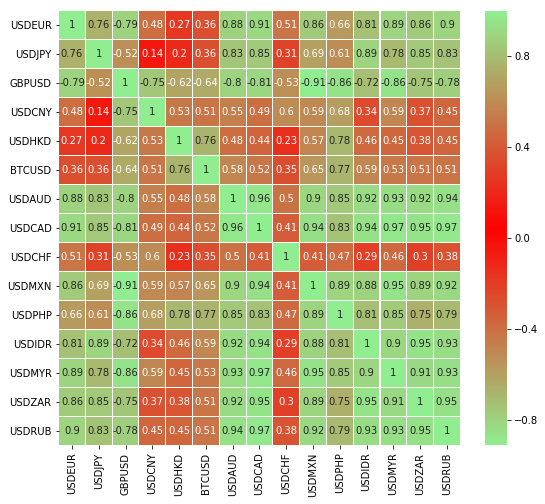

In [136]:
import matplotlib.colors

norm = matplotlib.colors.Normalize(-1,1)
colors = [[0, "lightgreen"], [0.5, "red"], [1, "lightgreen"]]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

corrmat = currencies.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap = cmap, linewidths = 0.1, annot = corrmat)

In [158]:
highestCorr = {}
correlationLevel = 0.8
for x in corrmat.columns:
    for y in corrmat.index.values:
        if abs(corrmat[x][y]) > correlationLevel and x != y:
            highestCorr[x + "/" + y] = corrmat[x][y]
highestCorr = sorted(highestCorr.items(), key=lambda x: abs(x[1]), reverse = True)

Correlation coefficient : 0.973763


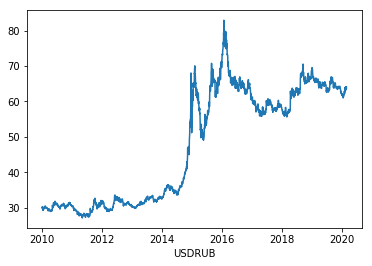

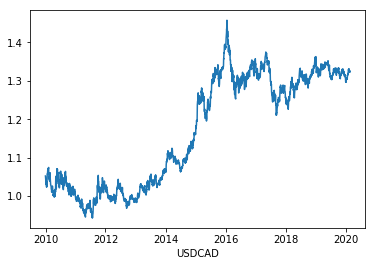

In [167]:
nCorrelatedPair = 1
pair = highestCorr[nCorrelatedPair][0].split("/")

plt.figure(1)
plt.plot(currencies.index, currencies[pair[0]])
plt.xlabel(pair[0])

plt.figure(2)
plt.plot(currencies.index, currencies[pair[1]])
plt.xlabel(pair[1])

print("Correlation coefficient : %f" %(highestCorr[nCorrelatedPair][1]))

In [166]:
asset = 'BTCUSD'
print("The most correlated currency pair to " + asset + " is " + corrmat[asset][corrmat.index != asset].abs().idxmax())
print("Correlation coefficient : " + str(corrmat[asset][corrmat.index != asset].abs().max()))

The most correlated currency pair to BTCUSD is USDPHP
Correlation coefficient : 0.7664732072169873
